In [4]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('ev_vs_petrol_dataset_v3.csv')
df.head()

,country,region,year,vehicle_segment,powertrain_type,ev_sales,petrol_car_sales,diesel_car_sales,total_vehicle_sales,ev_market_share,...,avg_ev_range_km,fuel_price_usd_per_liter,electricity_price_usd_per_kwh,gdp_per_capita,urban_population_percent,co2_emissions_transport_mt,ev_subsidy_usd,emission_regulation_score,ev_growth_rate_yoy,is_ev_dominant
0,Australia,Oceania,2010,commercial,ICE,5,92877,61921,154803,0.00,...,124,1.09,0.149,51977,88.8,88.7,0,30.4,0.00,0
1,Australia,Oceania,2010,mass_market,ICE,57,535933,73089,609079,0.01,...,124,1.09,0.149,51977,88.8,88.7,0,30.4,0.00,0
2,Australia,Oceania,2010,premium,ICE,37,235282,20462,255781,0.01,...,124,1.09,0.149,51977,88.8,88.7,0,30.4,0.00,0
3,Australia,Oceania,2011,commercial,ICE,11,98092,65395,163498,0.01,...,133,1.09,0.163,52807,88.9,88.3,0,30.8,120.00,0
4,Australia,Oceania,2011,mass_market,ICE,129,569679,77684,647492,0.02,...,133,1.09,0.163,52807,88.9,88.3,0,30.8,126.32,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        1200 non-null   object 
 1   region                         1200 non-null   object 
 2   year                           1200 non-null   int64  
 3   vehicle_segment                1200 non-null   object 
 4   powertrain_type                1200 non-null   object 
 5   ev_sales                       1200 non-null   int64  
 6   petrol_car_sales               1200 non-null   int64  
 7   diesel_car_sales               1200 non-null   int64  
 8   total_vehicle_sales            1200 non-null   int64  
 9   ev_market_share                1200 non-null   float64
 10  charging_stations              1200 non-null   int64  
 11  fast_chargers_share            1200 non-null   float64
 12  avg_ev_range_km                1200 non-null   i

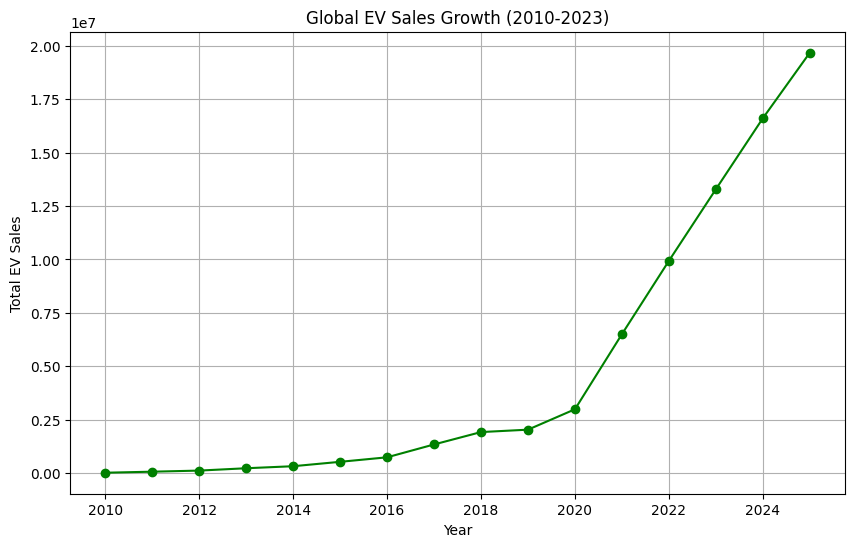

In [7]:
yearly_ev_sales = df.groupby('year')['ev_sales'].sum()

plt.figure(figsize=(10, 6))
yearly_ev_sales.plot(kind='line', marker='o', color='green')
plt.title('Global EV Sales Growth (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.grid(True)
plt.show()

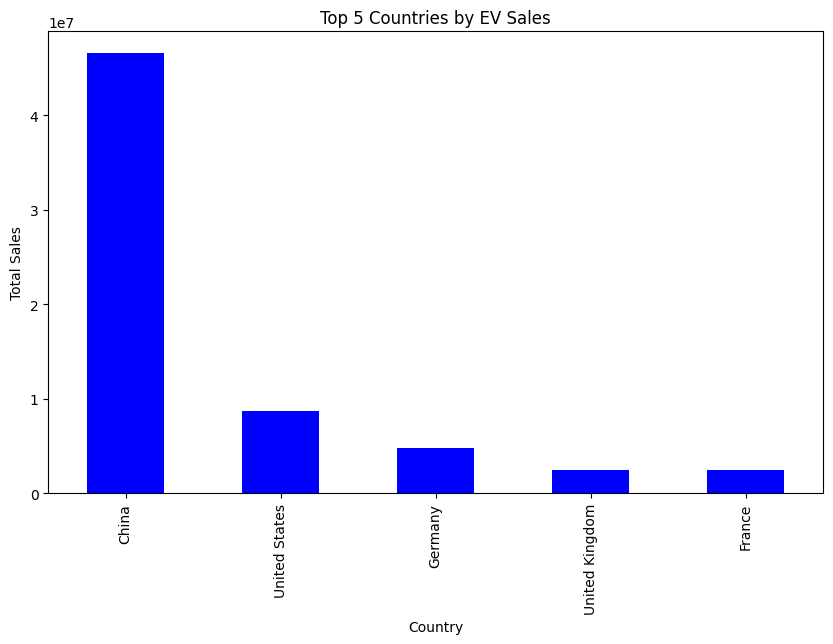

In [8]:
country_sales = df.groupby('country')['ev_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
country_sales.head(5).plot(kind='bar', color='blue')
plt.title('Top 5 Countries by EV Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


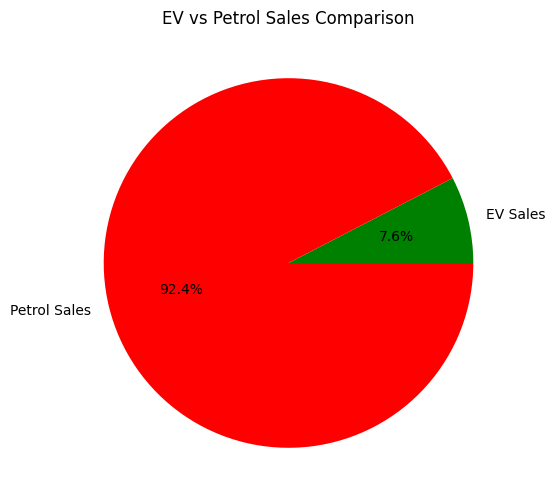

In [9]:
total_ev = df['ev_sales'].sum()
total_petrol = df['petrol_car_sales'].sum()

plt.figure(figsize=(6, 6))
plt.pie([total_ev, total_petrol], labels=['EV Sales', 'Petrol Sales'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('EV vs Petrol Sales Comparison')
plt.show()

In [10]:
df.describe()

,year,ev_sales,petrol_car_sales,diesel_car_sales,total_vehicle_sales,ev_market_share,charging_stations,fast_chargers_share,avg_ev_range_km,fuel_price_usd_per_liter,electricity_price_usd_per_kwh,gdp_per_capita,urban_population_percent,co2_emissions_transport_mt,ev_subsidy_usd,emission_regulation_score,ev_growth_rate_yoy,is_ev_dominant
count,1200.000000,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,2017.500000,6.360236e+04,7.733063e+05,1.409369e+05,9.778455e+05,6.327992,5.693898e+04,14.437750,265.872500,1.342239,0.169508,35651.525000,74.609000,190.837000,2910.940000,58.761860,64.002958,0.018333
std,4.611694,4.079506e+05,1.756934e+06,2.913472e+05,2.211799e+06,13.231723,3.359383e+05,10.057529,121.994051,0.363461,0.079298,23899.013679,14.858811,363.100639,2477.306742,20.092871,71.386797,0.134210
min,2010.000000,5.000000e+00,1.727000e+03,1.500000e+02,1.748000e+04,0.000000,0.000000e+00,0.000000,106.000000,0.482900,0.066990,1359.000000,30.900000,5.400000,0.000000,19.484000,-40.960000,0.000000
25%,2013.750000,2.002500e+02,8.870500e+04,1.951075e+04,1.300465e+05,0.077500,4.917500e+02,6.000000,150.000000,1.097000,0.098750,11077.250000,64.175000,30.175000,0.000000,43.600000,16.372500,0.000000
50%,2017.500000,2.731500e+03,2.294785e+05,5.136100e+04,2.905130e+05,0.830000,4.090000e+03,12.900000,238.500000,1.352000,0.158000,37329.000000,79.900000,94.250000,2794.500000,59.350000,44.165000,0.000000
75%,2021.250000,1.990500e+04,6.385320e+05,1.111910e+05,7.624482e+05,5.832500,2.251800e+04,20.950000,380.250000,1.568500,0.220250,50930.000000,84.075000,159.575000,4973.750000,74.825000,80.907500,0.000000
max,2025.000000,7.670056e+06,1.477369e+07,2.014595e+06,1.884998e+07,95.000000,4.338106e+06,49.300000,507.000000,2.153000,0.379040,103437.000000,98.500000,1900.800000,8952.000000,95.602000,300.000000,1.000000


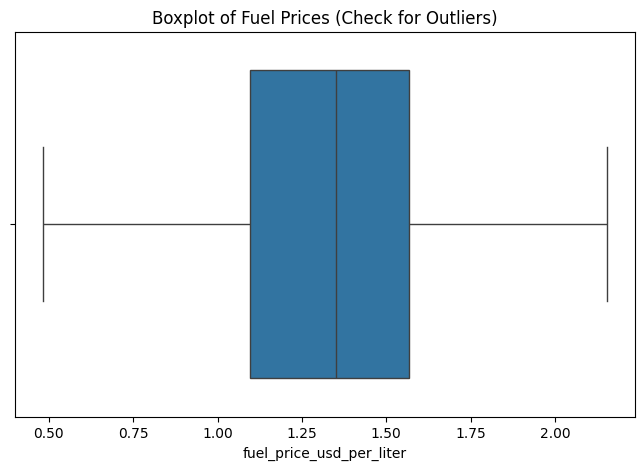

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['fuel_price_usd_per_liter'])
plt.title('Boxplot of Fuel Prices (Check for Outliers)')
plt.show()

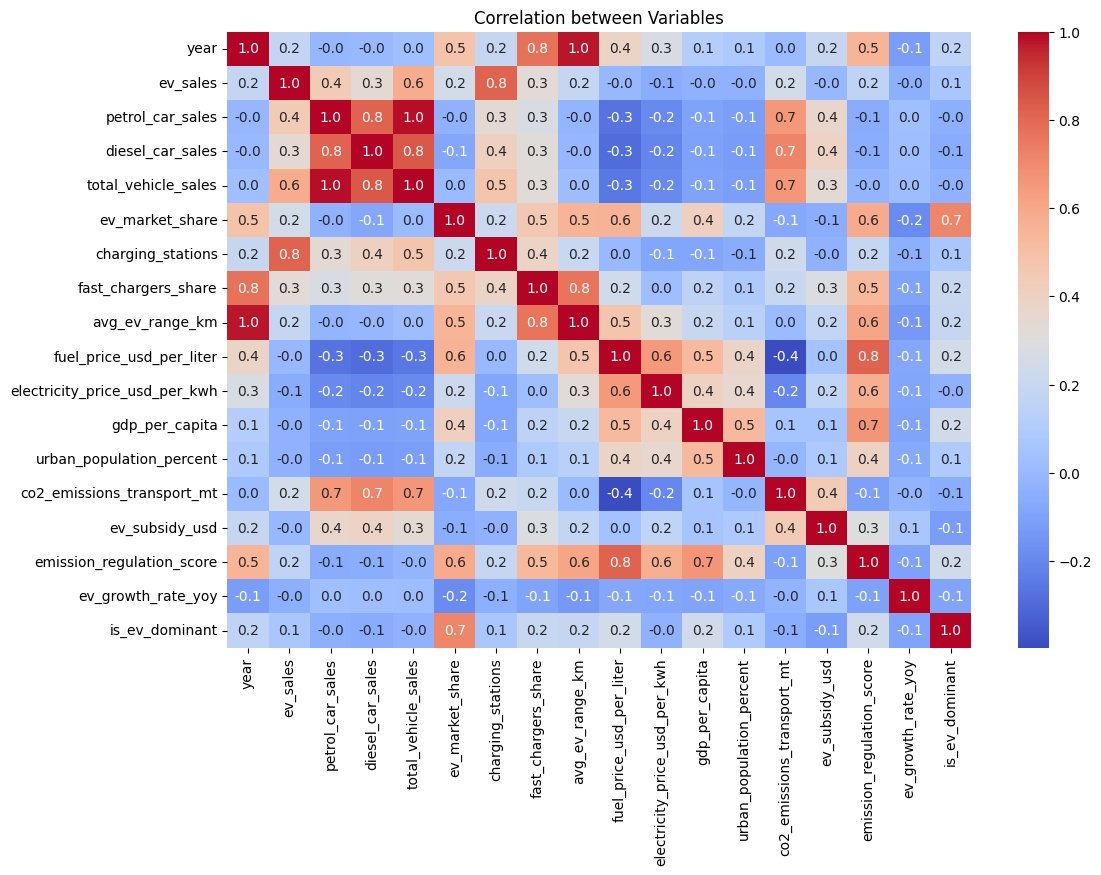

In [12]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation between Variables')
plt.show()